In [1]:
from libpypack.locations import map_locations
from libpypack.visualization import generate_maps
from libpypack.visualization import heatmap
from libpypack.visualization import choropleth
from libpypack.locations import webpage_locations
import pandas as pd
import imageio
import glob, os


Using TensorFlow backend.


In [2]:
# from time import process_time 
# t1_start = process_time()
# tweet_df = map_locations.locations_df(csv_file="twitter_test.csv", sep=',')
# t1_end = process_time()
# print("Elapsed time during the whole program in seconds:", t1_end-t1_start)

In [3]:
# tweet_df.to_csv('parsedCSV.csv')
tweet_df = pd.read_csv('parsedCSV.csv')
tweet_df

,Unnamed: 0,TweetID,Timestamp,Full_Text,In_Reply_To_User_ID,User_ID,User_Name,User_Screen_Name,Coordinates,Place,Bounding_Box,Quoted_Status_ID,Retweeted_Status,Hashtags,URLs,User_Mentions,Media,Language,locs
0,0,1049266922716647431,2018-10-08 11:55:03,b'@drfhutchinson @USAWrestling @MOKWCKS @salin...,NaN,2485385736,Jerry bowen,jerrybowen74,NaN,NaN,[],0,1049145615484166144,[],[],"{'drfhutchinson': 285414565, 'USAWrestling': 2...",[],en,"{'Kansas': ('38.50029', '-98.50063')}"
1,1,1049266922850680834,2018-10-08 11:55:03,b'Engel &amp; V\xc3\xb6lkers Florida Launch Gr...,NaN,2228327040,LinkedInMoreBiz,LinkdInMoreBiz,NaN,NaN,[],0,[],[],['http://dlvr.it/Qmfy4V'],{},[],de,"{'Florida': ('28.75054', '-82.5001')}"
2,2,1049266916039249920,2018-10-08 11:55:01,b'This article underscores all the points made...,NaN,162260868,Food4Thaught(JimH),food4thaught,NaN,"Raritan, NJ","[[[-74.662059, 40.556331], [-74.662059, 40.586...",1048939624696107010,[],[],['https://twitter.com/i/web/status/10492669160...,"{'MMFlint': 20479813, 'HouseofCards': 1023096199}",[],en,"{'Little America': ('41.54357', '-109.85903')}"
3,3,1049266928299065344,2018-10-08 11:55:04,b'Illegal immigrant charged in New York with v...,NaN,1913758158,M.C. I'm only Human,MamahChia,NaN,NaN,[],0,[],[],['https://www.foxnews.com/us/illegal-immigrant...,{},[],en,"{'New York': ('43.00035', '-75.4999')}"
4,4,1049266928508919809,2018-10-08 11:55:04,b'@CapShower @JohnCornyn It\xe2\x80\x99s the n...,NaN,908810922,🇺🇸🇺🇸🇺🇸 Mr. Liberal 🇺🇸🇺🇸🇺🇸,schotdoktor,NaN,NaN,[],0,1049122095169515520,[],[],"{'JohnCornyn': 13218102, 'CapShower': 86203053...",[],en,"{'Little America': ('41.54357', '-109.85903')}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,948,1049267725112152064,2018-10-08 11:58:14,b'It was a big battle in the 1880s whether to ...,NaN,174724771,fm_painter,fm_painter,NaN,NaN,[],1048609656527118337,1048992231624003585,[],[],{'davidfrum': 18686907},[],en,"{'North Dakota': ('47.50027', '-100.00068')}"
949,949,1049267725715955713,2018-10-08 11:58:14,b'EMERGENCY!!! #Texas does not do online voter...,NaN,825138749231157249,Margaret Hiatt,politeperson123,NaN,NaN,[],0,1049140096778358784,['Texas'],[],{'bluewaveinfo1': 1048967307094118400},[],en,"{'Texas': ('31.25044', '-99.25061')}"
950,950,1049267726080913409,2018-10-08 11:58:15,b'Driver Gets Caught in Protest - Plows Throug...,NaN,873185940579078144,Paul Truett Dove,paultdove,NaN,NaN,[],0,1049112399276650496,[],[],{'Can2geterdone': 719662077934243840},[],en,"{'Portland': ('45.52345', '-122.67621')}"
951,951,1049267727108427776,2018-10-08 11:58:15,b'Hey @taylorswift13 - You just endorsed a Dem...,NaN,2863158308,Brenda Baller,DenverPower,NaN,NaN,[],0,1049098893420634113,[],[],"{'taylorswift13': 17919972, 'charliekirk11': 2...",[],en,"{'Tennessee': ('35.75035', '-86.25027')}"


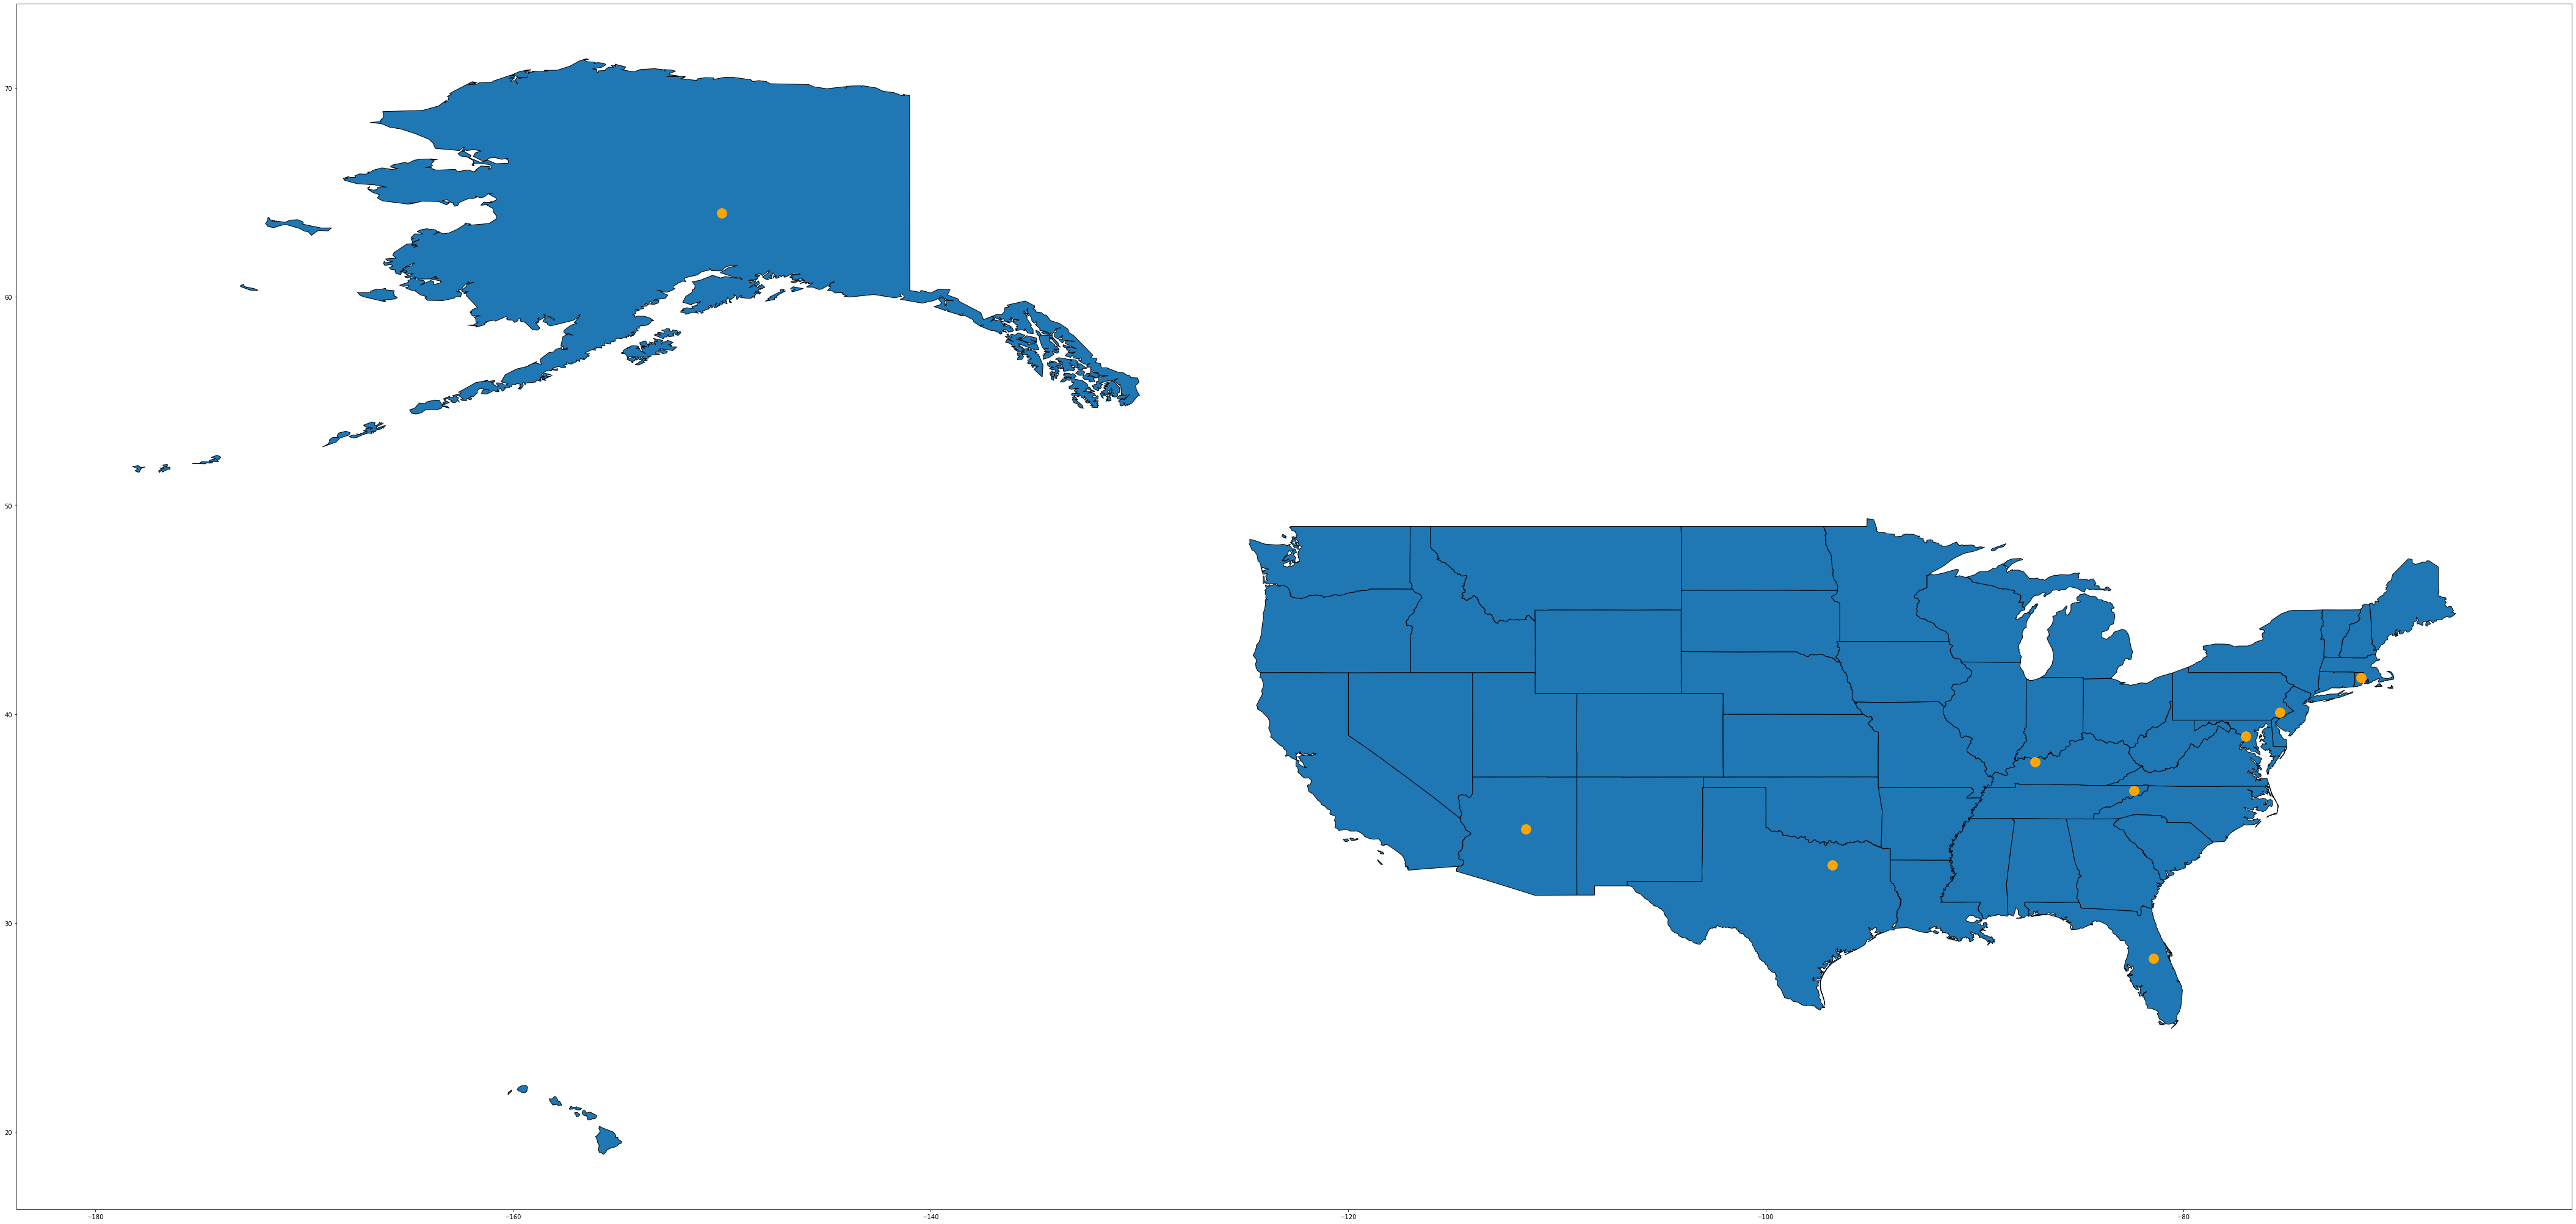

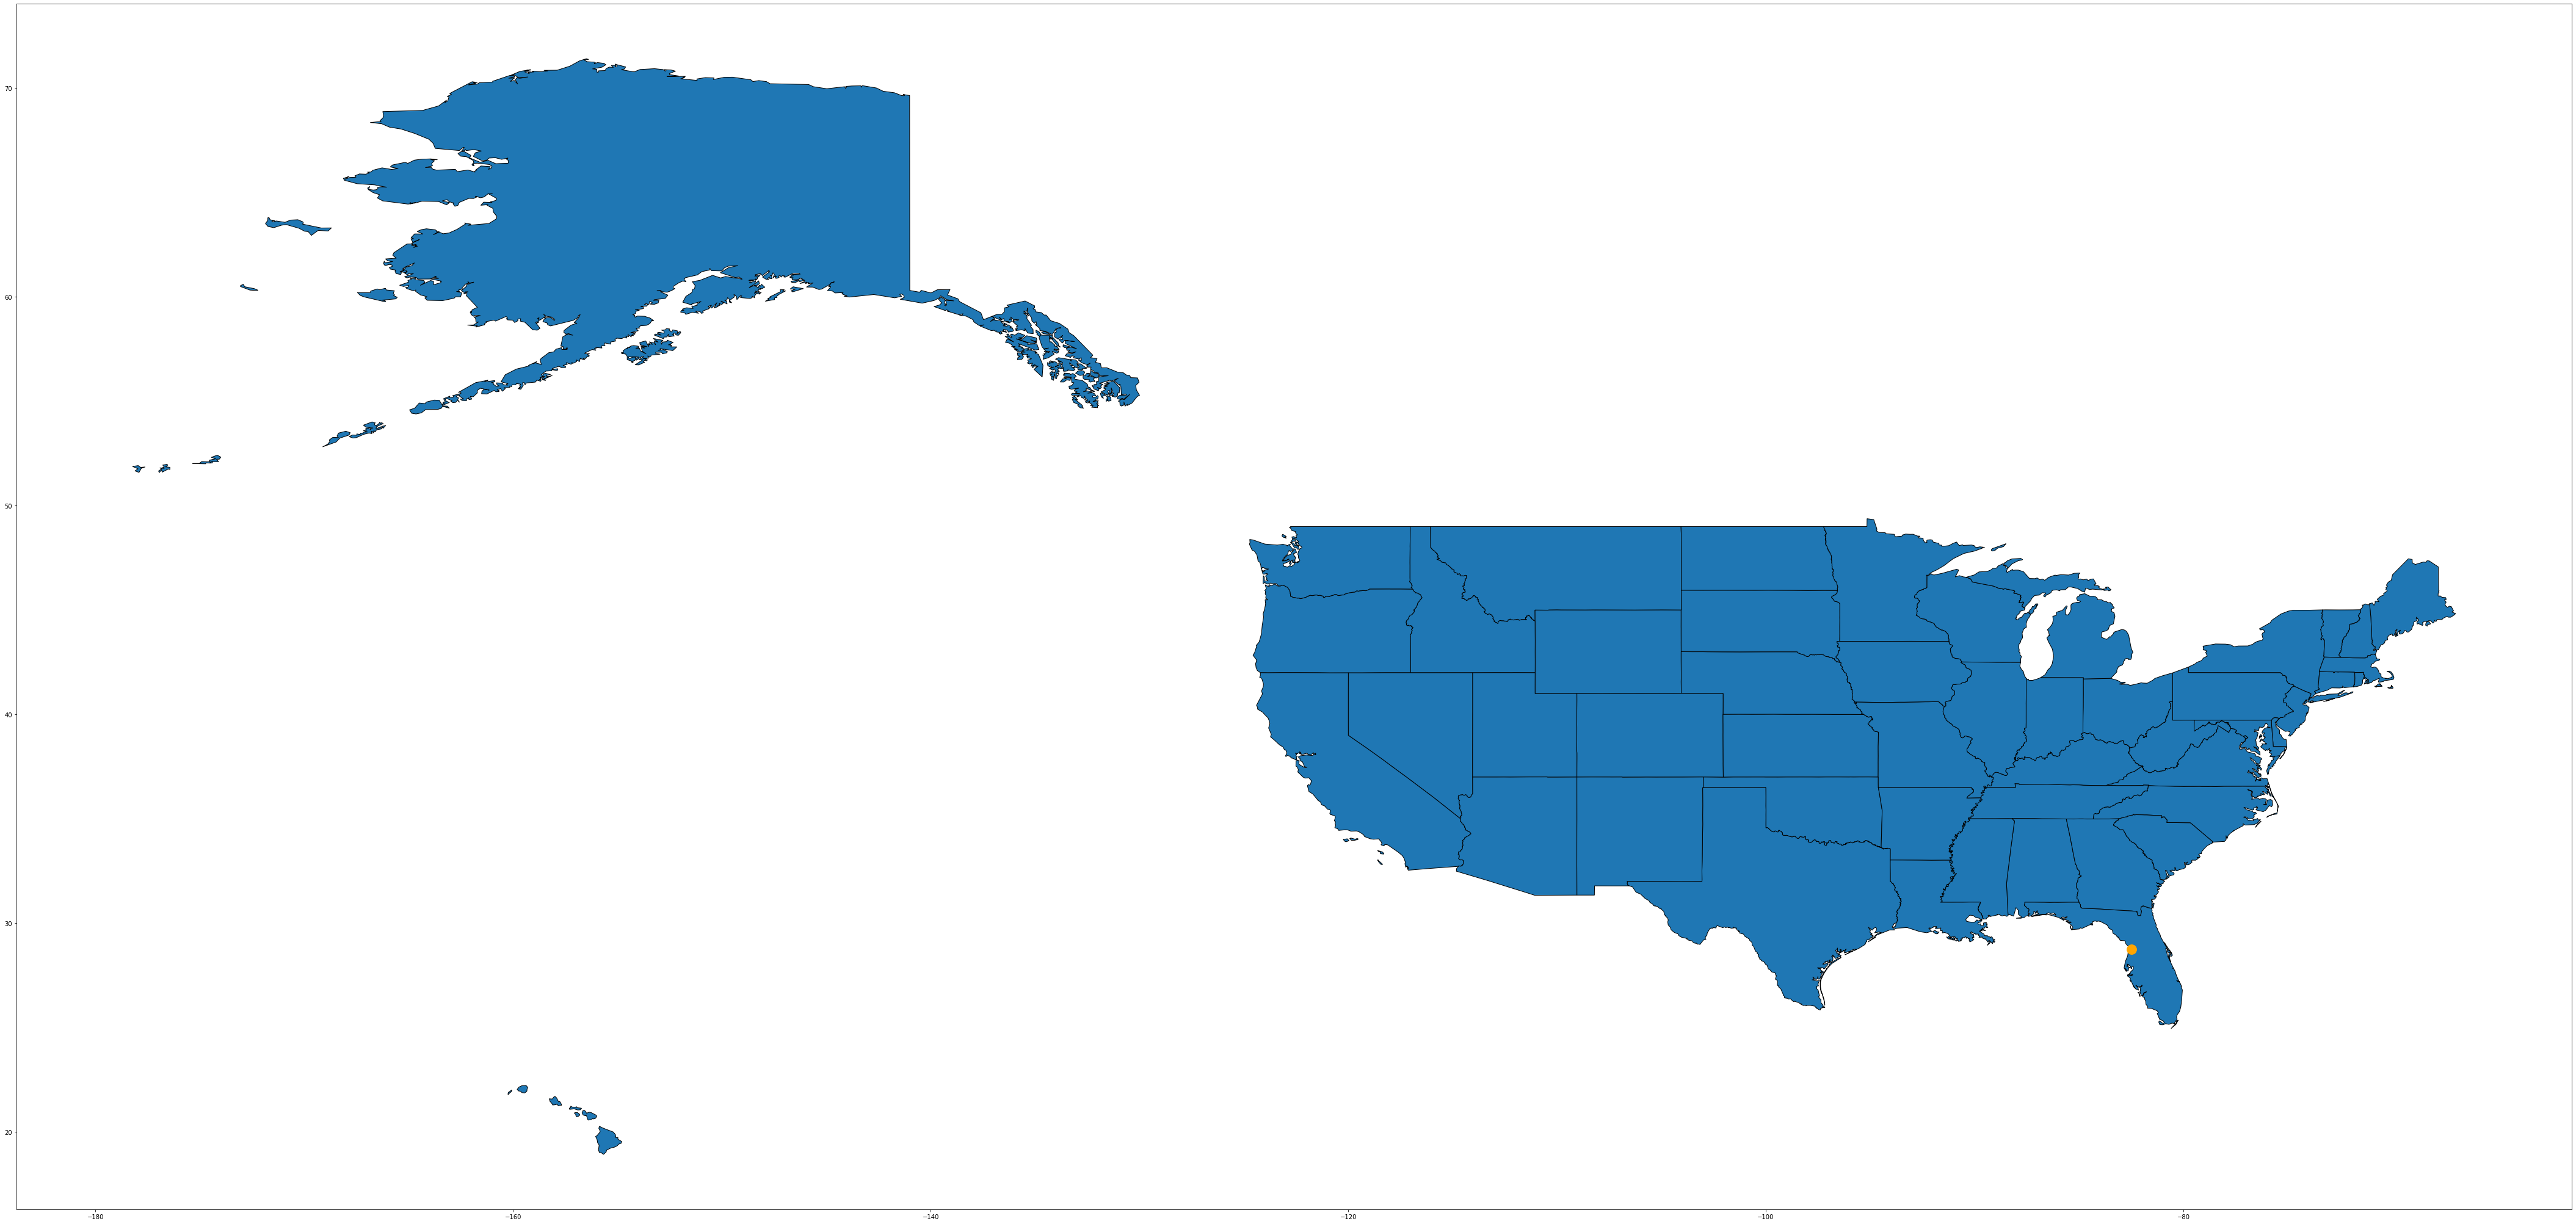

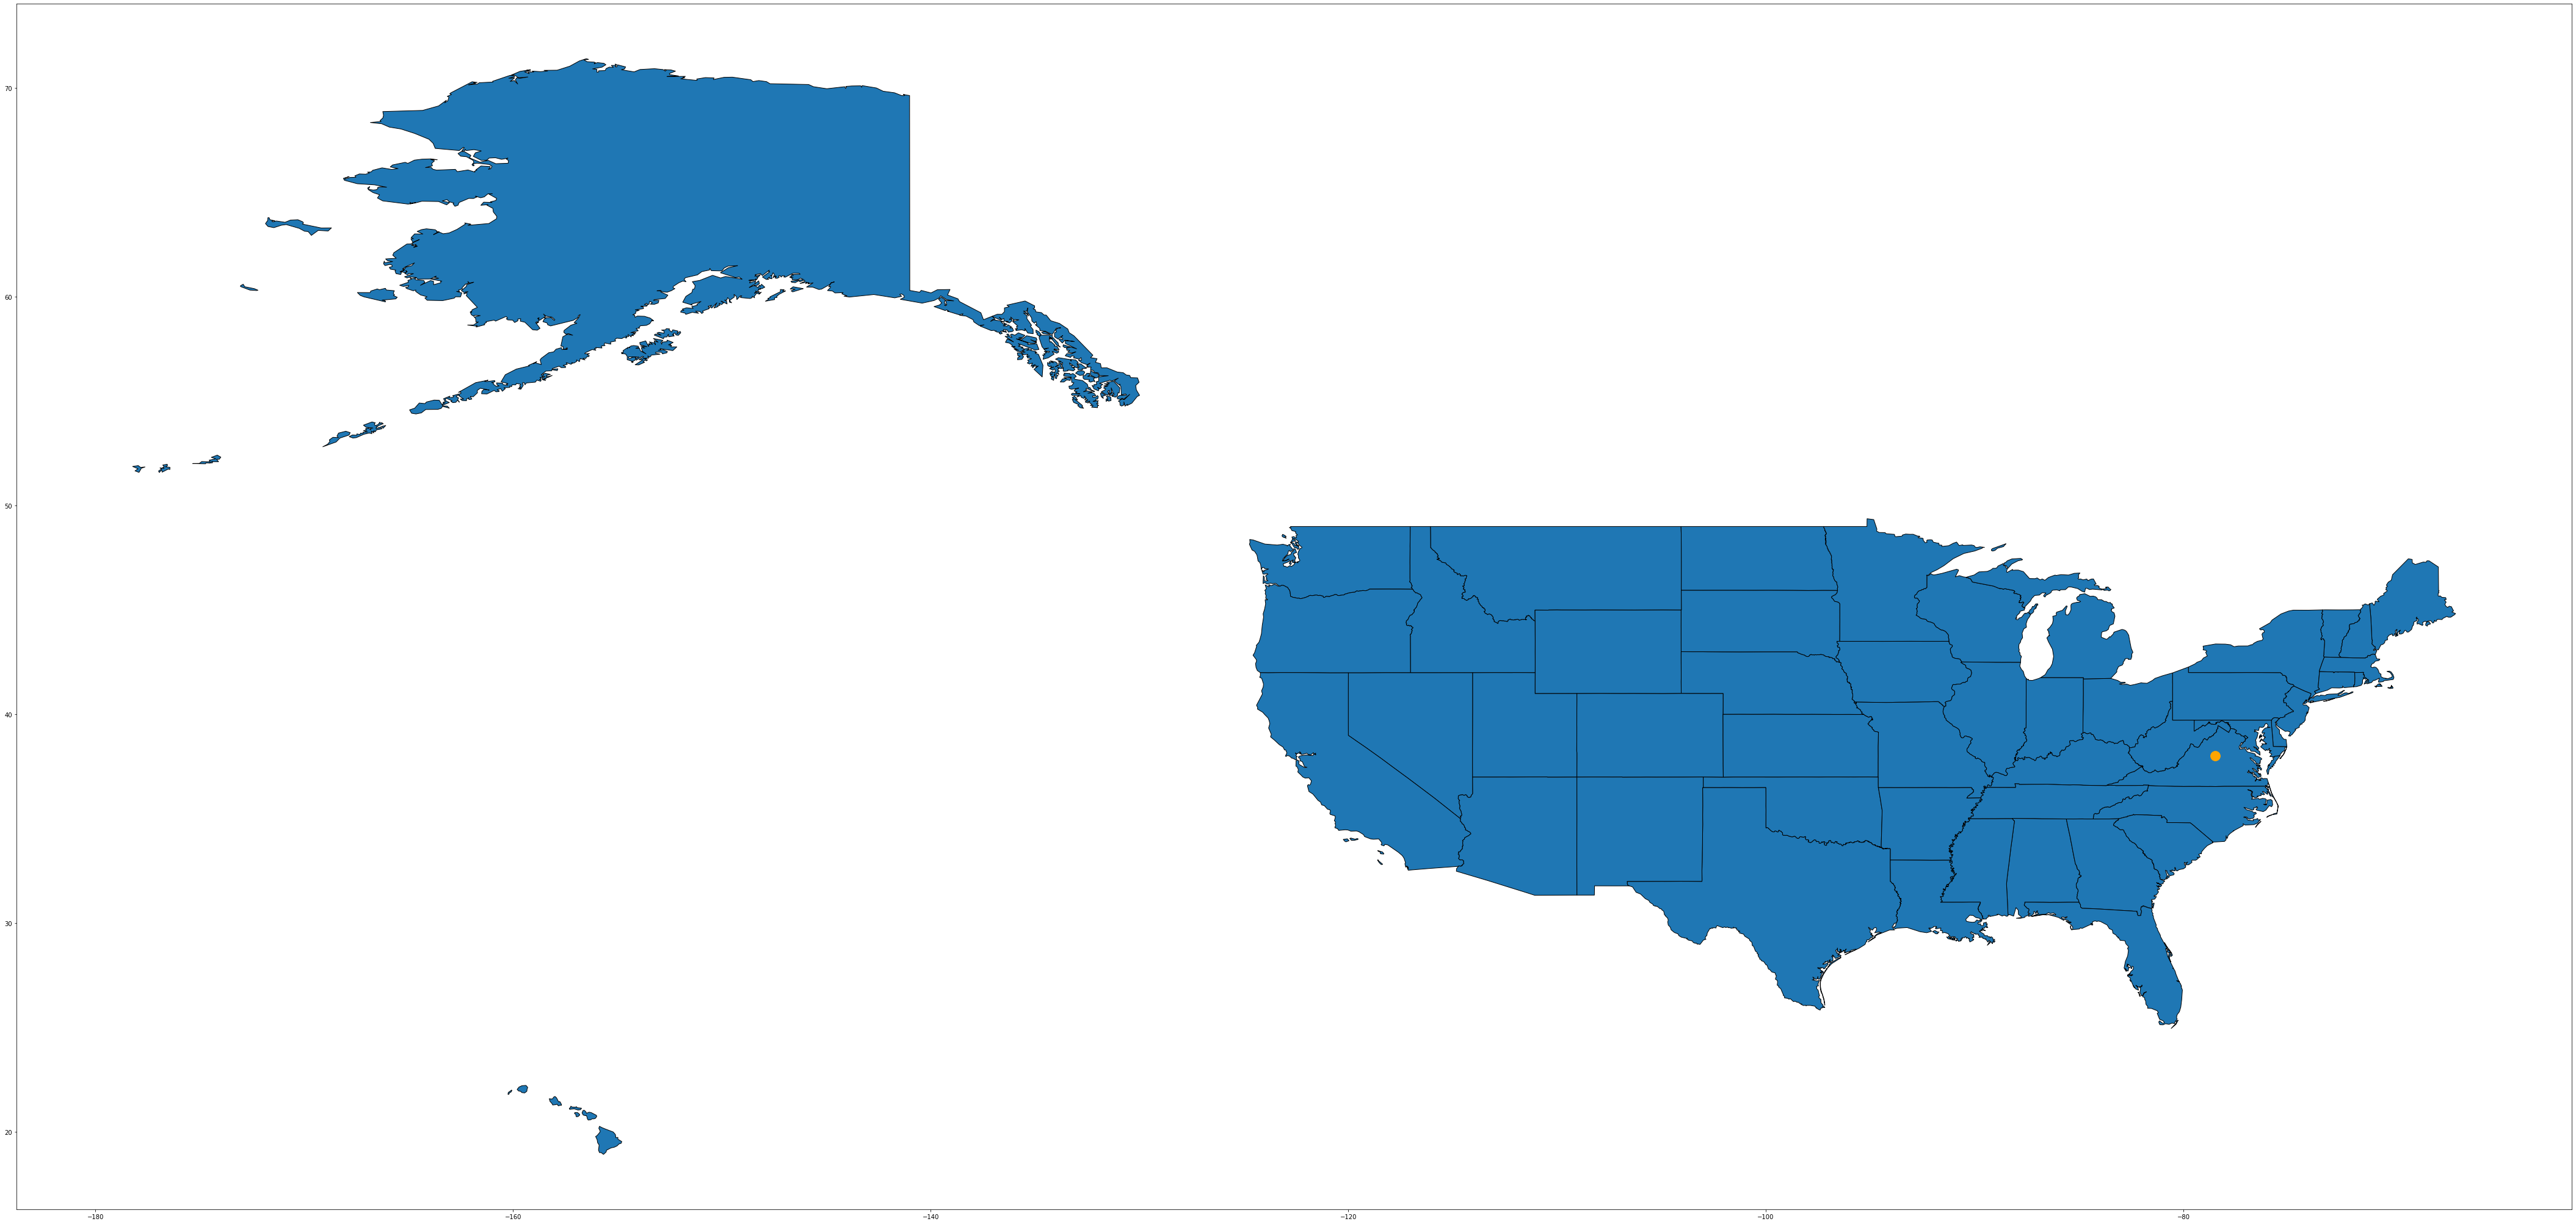

In [12]:
def track_user(df, user_column="User_ID", location_column="locs", time_column="Timestamp"):
    df[df['Value'] == True]

def get_user_df(df, user_value, user_column='User_ID', time_column='Timestamp'):
#     df = pd.concat(user for _, user in location_df.groupby(user_column) if len(user) > 1)
    return df[df[user_column] == user_value].sort_values(by=time_column).reset_index(drop=True)
    
def get_min_max_date(aggregate_df, time_column='Timestamp'):
    min_date = min(time_df[time_column])
    max_date = max(time_df[time_column])
    return min_date, max_date

def create_user_gif(user_df, filepath):
    images = []
    filenames = []
    
    for i in range(0, len(user_df)):
        gdf, loc_gdf = generate_maps.generate_overlay_gdf(user_df[user_df.index == i])
        ax, plot, graph = generate_maps.plot_gdf(gdf, loc_gdf)
        plot.savefig('choropleth_{}.png'.format(i))
        
    for file in glob.glob(filepath + "*.png"):
        images.append(imageio.imread(file))
        
    imageio.mimsave('choro.gif', images)

user_df = get_user_df(tweet_df, 12759492)
create_user_gif(user_df, '/Users/thatcher/Documents/GraduateSchool/Thesis/FORKS/PyPACK/notebooks/')


In [13]:
x = "sum.gif"
print(x[-4:])

.gif


In [ ]:
# web_gdf = generate_maps.get_loc_gdf(user_df.iloc[0])
# xdf = choropleth.choropleth_map(web_gdf, shp_path="/Users/thatcher/Documents/GraduateSchool/Thesis/FORKS/PyPACK/libpypack/examples/states_21basic/states.shp")
# # from matplotlib.animation import FuncAnimation
# # import matplotlib.pyplot as plt

# def plot_map(xdf, fig=fig, ax=ax):
# #     fig, ax = plt.subplots(1, 1)
#     choropleth_plot = xdf.plot(column='Count',
#                ax=ax,
#                legend=True,
#                legend_kwds={'label': "Number of Locations",
#                                'orientation': "horizontal"})
#     plt.savefig('choropleth.png')
#     return choropleth_plot

# def animate(i):
#     print(i)
#     graph = plot_map(xdf.iloc[i])
#     return graph

# fig, ax = plt.subplots(1, 1)
# ani = FuncAnimation(fig, animate, frames=1, interval=200)

# # plot = choropleth.plot_map(xdf)

In [ ]:
# web_df = webpage_locations.extract_webpage_locations(tweet_df)
# webpage_locations.map_web_locations(web_df)

In [ ]:
# web_gdf = generate_maps.get_loc_gdf(web_df, column_name='Para_Locs')
# choropleth.choropleth_map(web_gdf)

In [ ]:
# heatmap.heatmap(web_gdf)